# EDA


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques...
## Objective
`Geolocation Based Customer Analysis:`

The idea is to explore how various factors like car make & model, time and type of service etc.
vary with location. Since the servicing industry is local in nature, this kind of an analysis could
possibly render some really interesting business insights.
Furthermore, this analysis will enable us to formulate more concrete machine learning problems.
From the data at hand it is possible to extract insights about customer behaviour especially...
Lets play with Data.....

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import iplot
import pandas as pd
import plotly.graph_objs as go
#import cufflinks
from plotly.offline import init_notebook_mode
from tqdm import tqdm
from scipy.stats.mstats import winsorize

In [2]:
df=pd.read_csv('cust_inv_merged_final.csv').drop('Unnamed: 0',axis=1)


In [3]:
df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,7005200005,174158,84419,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


### ` Univarent Analysis`

In [4]:
# Shape
df.shape

(492314, 31)

Text(0.5, 1.0, '.............which customer generate more revenue................')

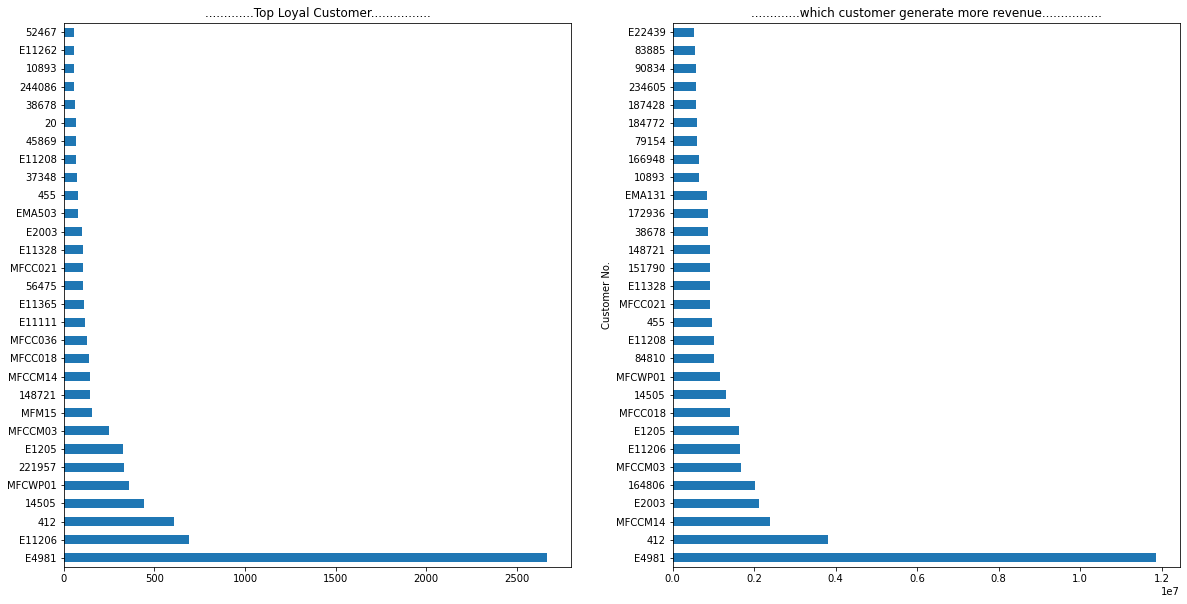

In [5]:
# Customer Frequency
plt.figure(figsize=(20,10))
plt.subplot(121)
df['Customer No.'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')
plt.title('.............Top Loyal Customer................')
plt.subplot(122)
# which customer generate more revenue
df.groupby(['Customer No.'])['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.title('.............which customer generate more revenue................')

- Recorganising the some of loyal customer... and here top 30 loyal customers which also generate more revenue
- It seems some customer like 'E4981','E11206'..etc are some transport companies who is repeated more than 2000 times whith diffrent vehicles

Text(0.5, 1.0, '.............Customer type................')

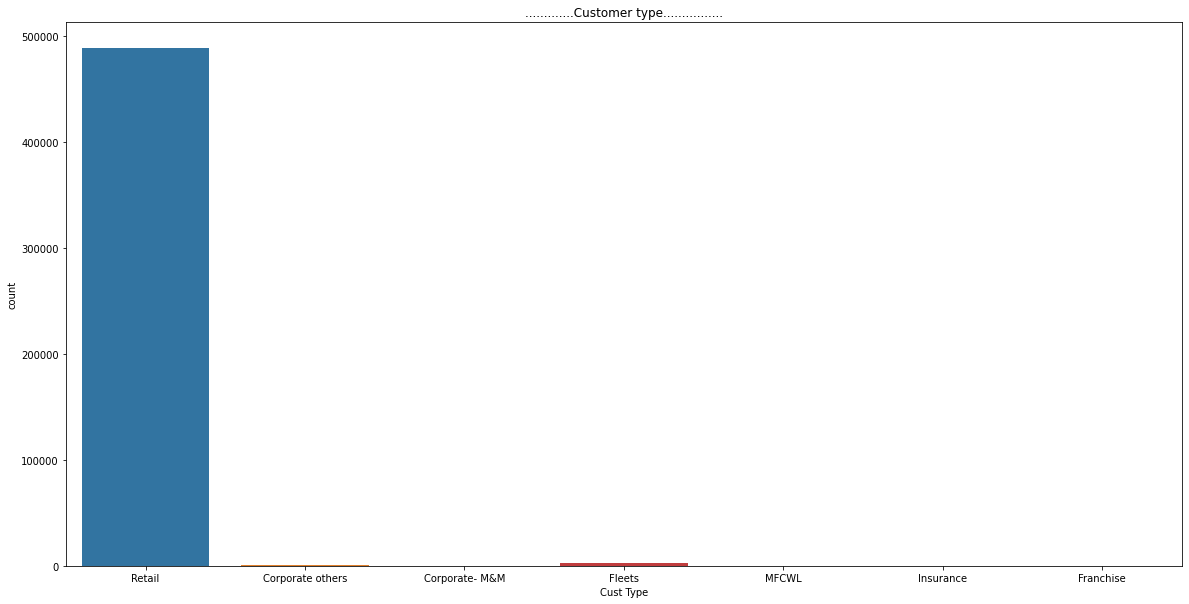

In [6]:
# Customer type distribution
plt.figure(figsize=(20,10))
sns.countplot(df['Cust Type'])
plt.title('.............Customer type................')

- maximum Customers are Retails type
- One question is coming in mind ..why comercial vehicle count is low? and its not good on bussiness prospective!

Text(0.5, 1.0, '.............partner type................')

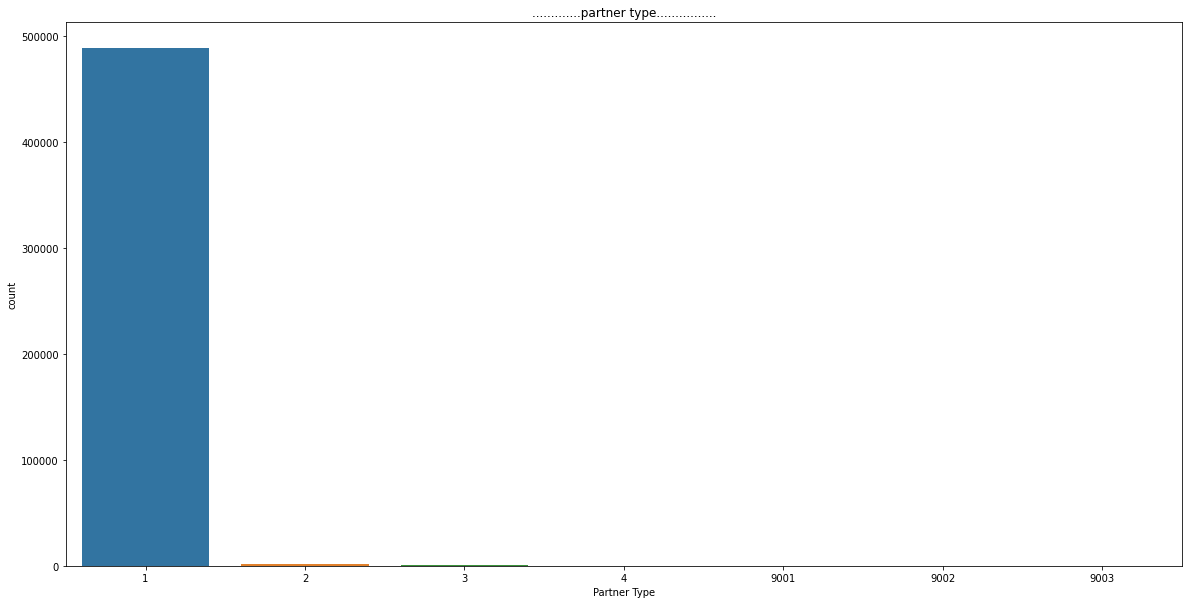

In [7]:
# Partner type distribution
plt.figure(figsize=(20,10))
sns.countplot(df['Partner Type'])
plt.title('.............partner type................')

Text(0.5, 1.0, '.............Order type................')

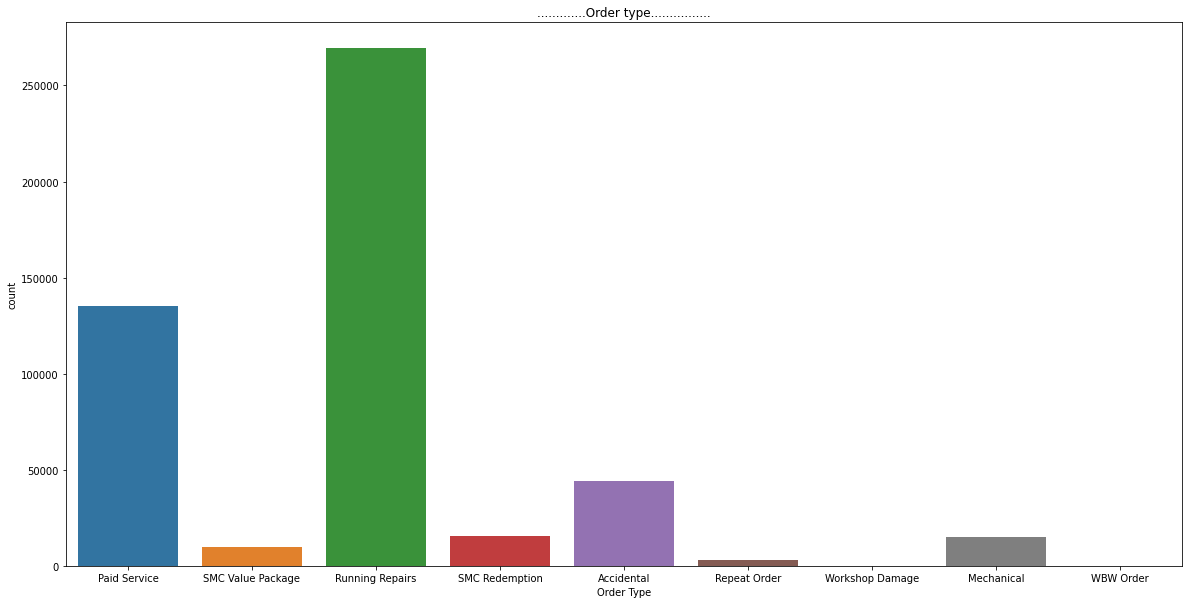

In [8]:
# Order type distribution
plt.figure(figsize=(20,10))
sns.countplot(df['Order Type'],orient = "h")
plt.title('.............Order type................')

In [9]:
df[df['Order Type'].isin(['SMC Value Package'])]['Total Amt Wtd Tax.'].value_counts()

1001.29    1301
1000.38     632
1002.18     590
1000.34     459
1000.41     365
           ... 
3998.60       1
7997.49       1
7999.95       1
5999.15       1
4999.12       1
Name: Total Amt Wtd Tax., Length: 1035, dtype: int64

smc value package price is 1000 per year

- Running Repair count is more 

Text(0.5, 1.0, '.............Top Data Origin................')

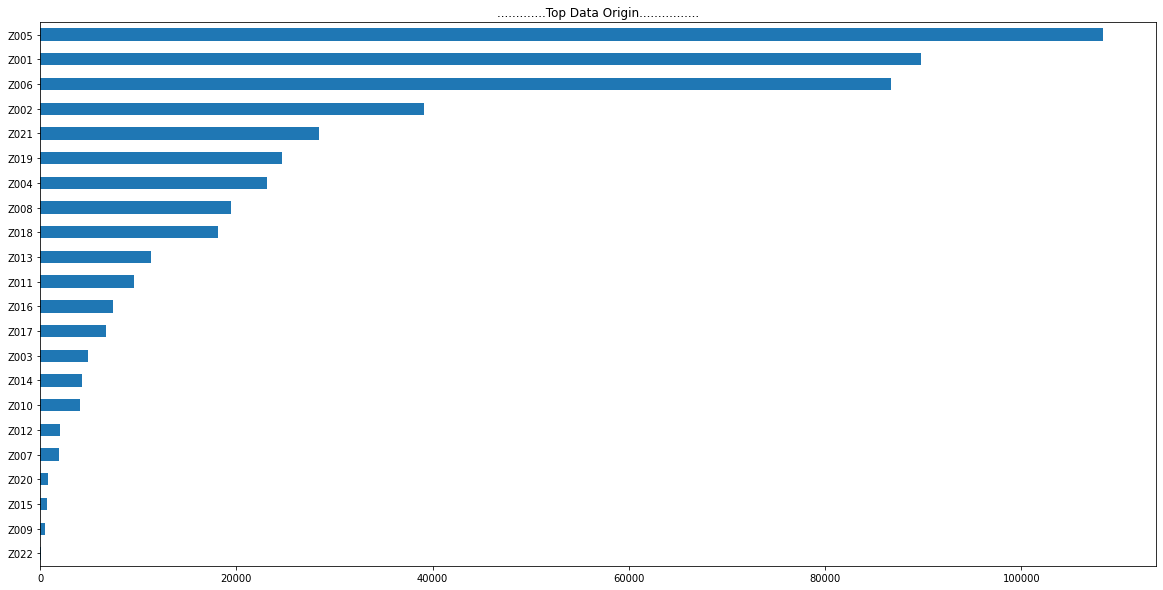

In [10]:
plt.figure(figsize=(20,10))
df['Data Origin'].value_counts().head(30).sort_values().plot(kind='barh')
plt.title('.............Top Data Origin................')

- maximum customer is coming through the refrences , we should give some rewards to refrece customer to make more success bussines strategy
- Compaining is also giving good customer count

Text(0.5, 1.0, '.............Top User id................')

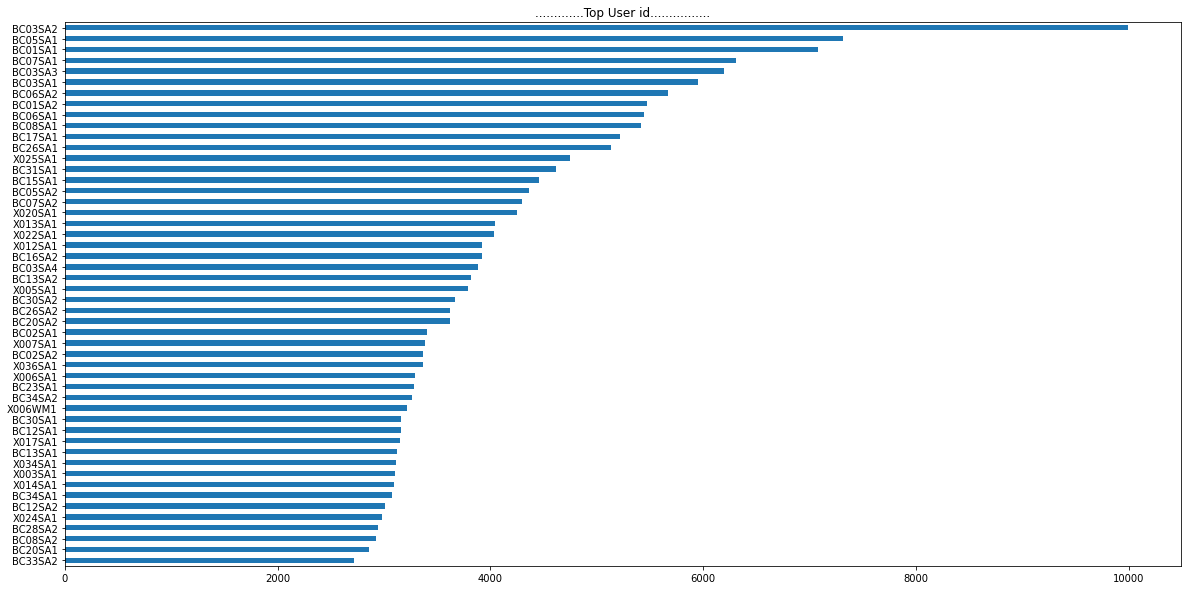

In [11]:

plt.figure(figsize=(20,10))
df['User ID'].value_counts().head(50).sort_values().plot(kind='barh')
plt.title('.............Top User id................')

Text(0.5, 1.0, '.............Top working Plant................')

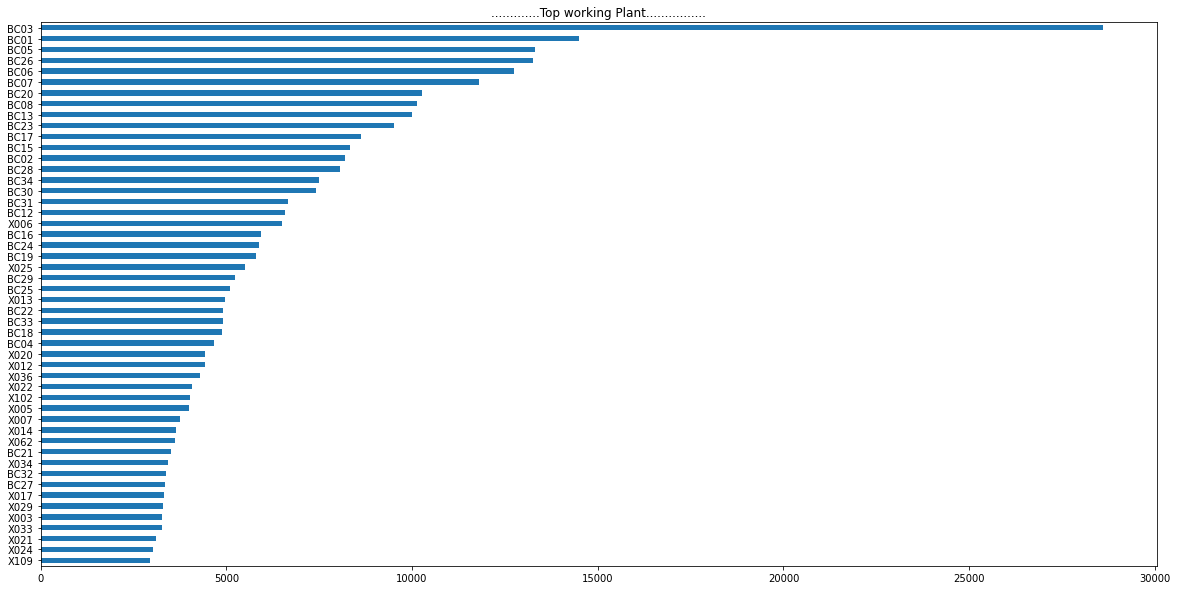

In [12]:
plt.figure(figsize=(20,10))
df['Plant'].value_counts().head(50).sort_values().plot(kind='barh')
plt.title('.............Top working Plant................')

- give the ranking of plant and  for Motivation give some rewards of top 10 plants annually.
- BC03 has tremendous Customer count.company should look implement the BC03 Model to whole Plant

Text(0.5, 1.0, '.............worse working Plant................')

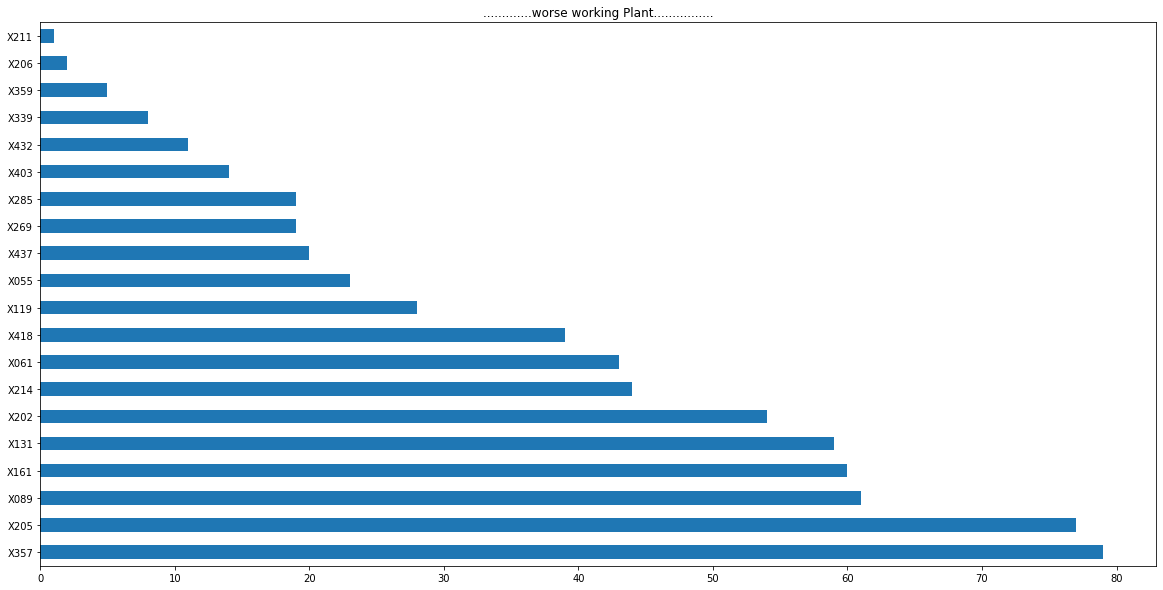

In [13]:
plt.figure(figsize=(20,10))
df['Plant'].value_counts().sort_values(ascending=False).tail(20).plot(kind='barh')
plt.title('.............worse working Plant................')

- 'X11', 'X006', 'X359', 'X339', 'X432'...etc are plants which are not giving counts so either we closed this plant or Reimplent the stretegy of these plants

Text(0.5, 1.0, '.............Top working count cities................')

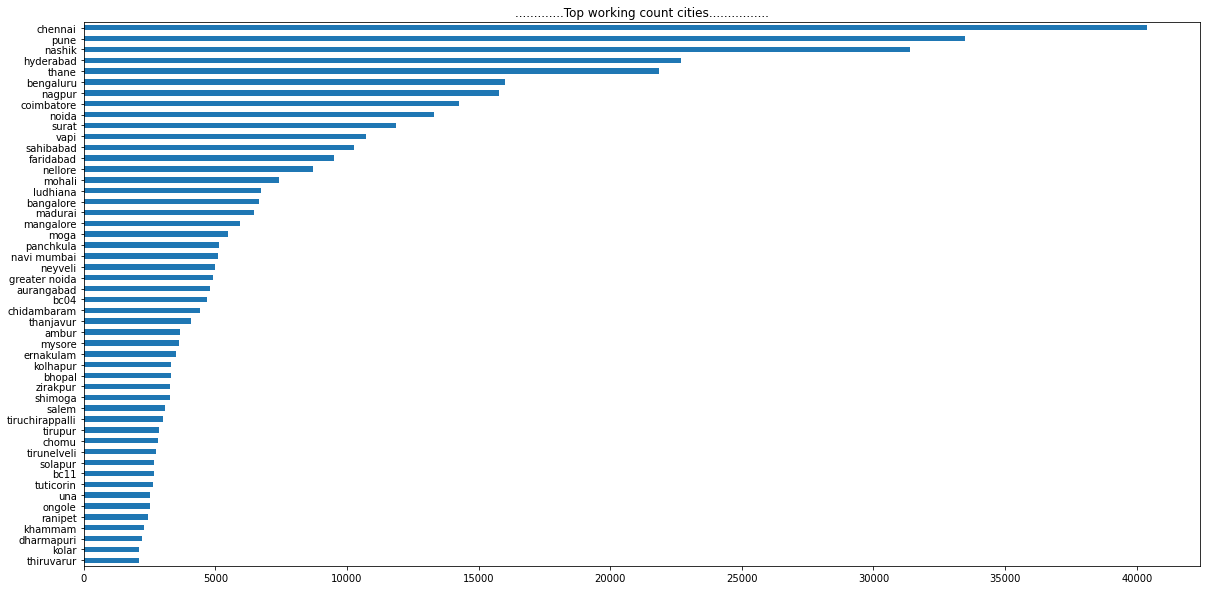

In [14]:
plt.figure(figsize=(20,10))
df['City'].value_counts().head(50).sort_values().plot(kind='barh')
plt.title('.............Top working count cities................')


Text(0.5, 1.0, '.............worse working count cities................')

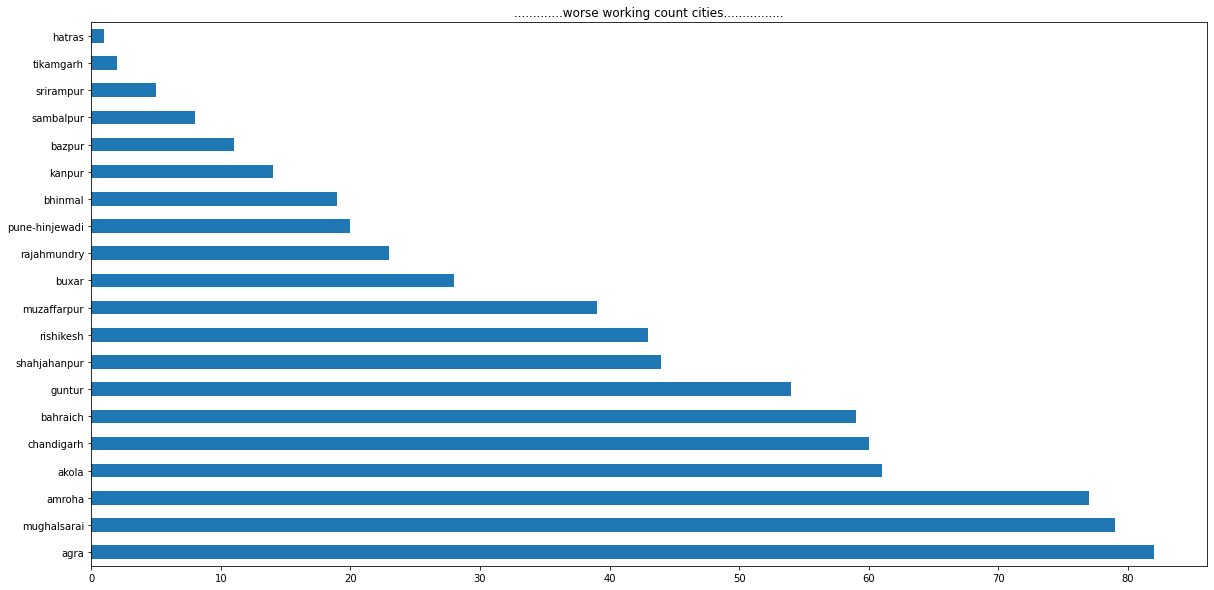

In [15]:
plt.figure(figsize=(20,10))
df['City'].value_counts().sort_values(ascending=False).tail(20).plot(kind='barh')
plt.title('.............worse working count cities................')

 - We should reimplement bussenss stretagy of these cities

Text(0.5, 1.0, '.............Top working count State................')

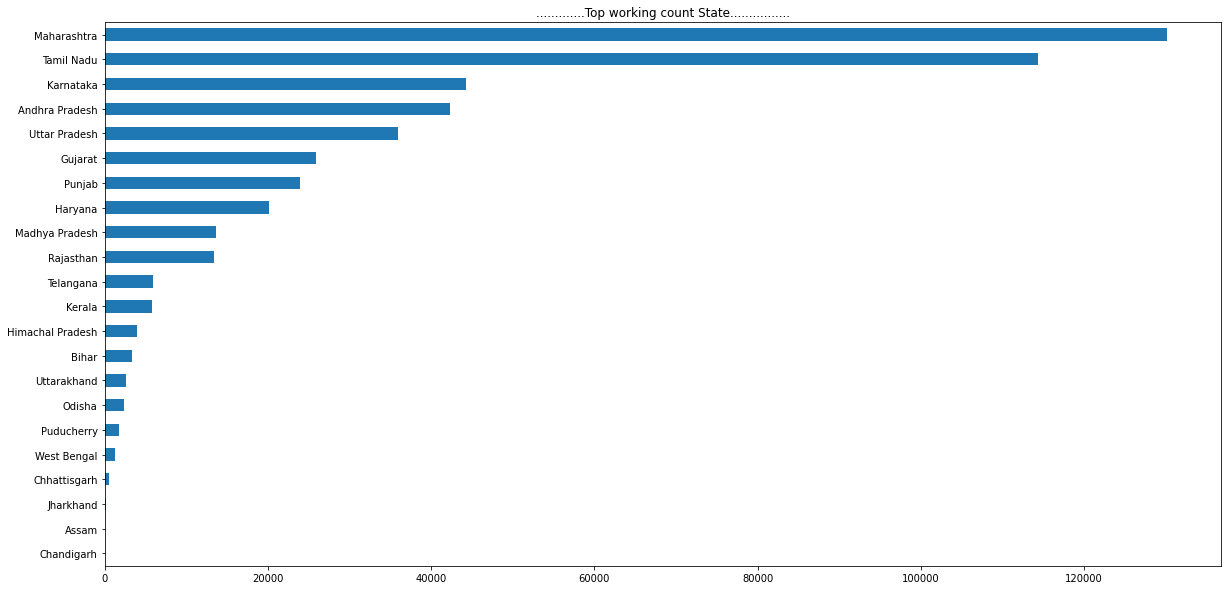

In [16]:
plt.figure(figsize=(20,10))
df['state'].value_counts().sort_values().plot(kind='barh')
plt.title('.............Top working count State................')


Text(0.5, 1.0, '.............Make count ................')

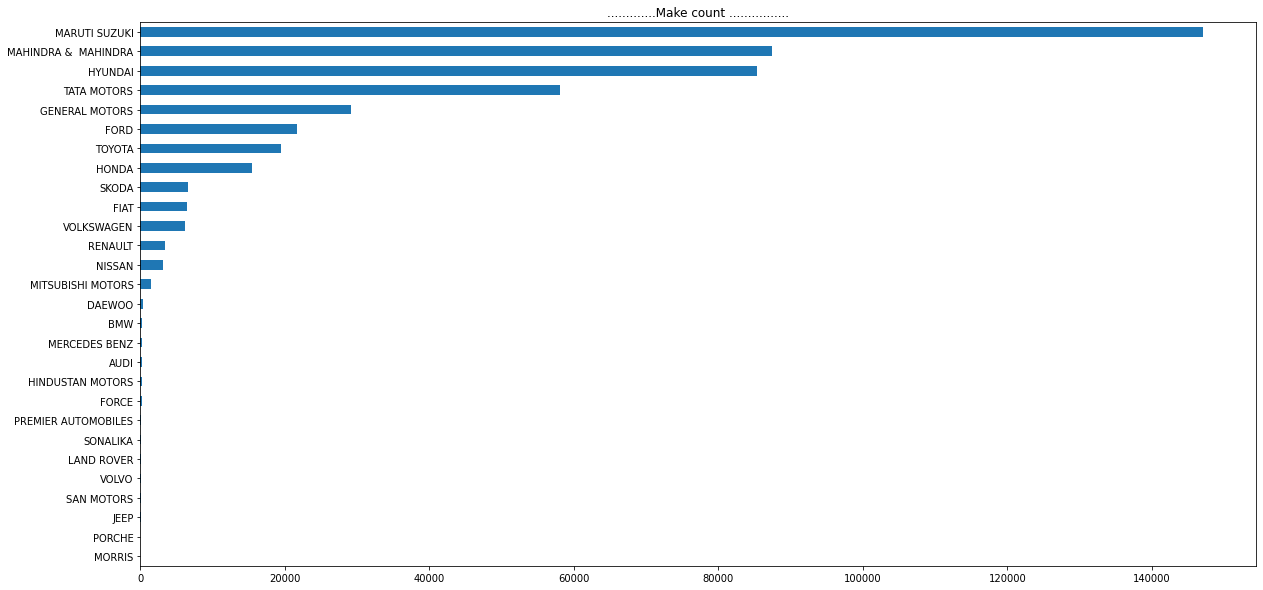

In [17]:
plt.figure(figsize=(20,10))
df['Make'].value_counts().sort_values().plot(kind='barh')
plt.title('.............Make count ................')

In [21]:
invoice=pd.read_csv('Final_invoice.csv')
new_df=pd.merge(df,invoice[['Invoice No','Regn No']],on='Invoice No',how='left')
new_df.groupby('Regn No')['Total Amt Wtd Tax.'].mean()
new_df.groupby('Regn No')['Total Amt Wtd Tax.'].mean()
new_df=new_df.dropna()

In [22]:
new_df['Regn No']=new_df['Regn No'].drop_duplicates().dropna()
new_df=new_df.dropna()

Text(0.5, 1.0, '.............least Model count ................')

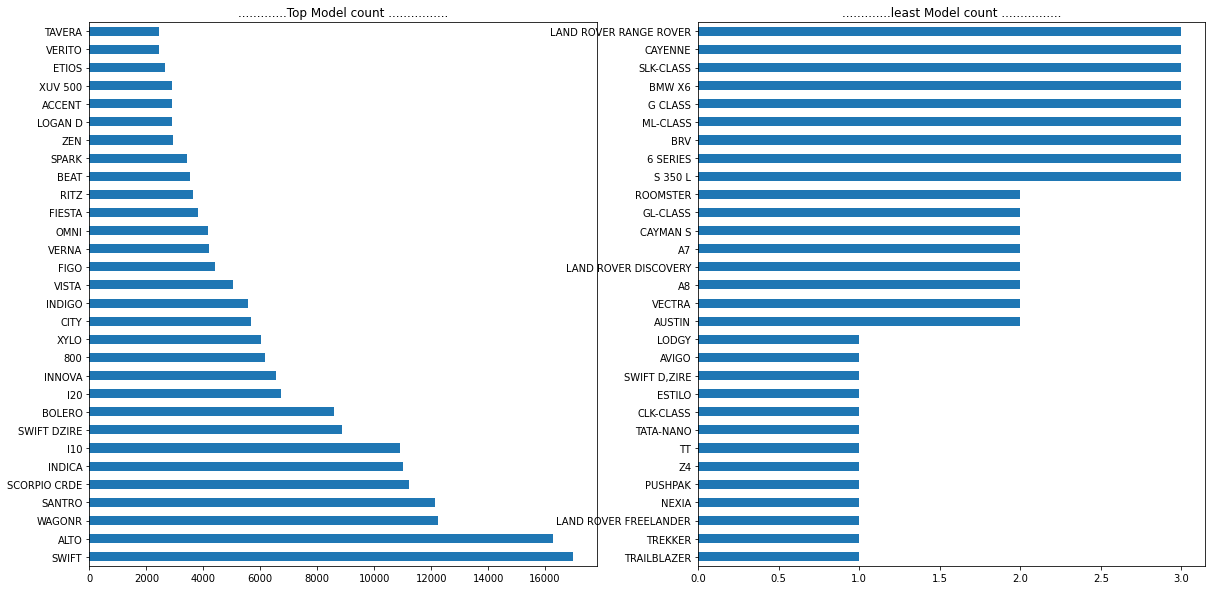

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(121)
new_df['Model'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')
plt.title('.............Top Model count ................')
plt.subplot(122)
new_df['Model'].value_counts().sort_values().head(30).plot(kind='barh')
plt.title('.............least Model count ................')

- This chart depicts the top 30 most owned car models throughout the country.
- Pattern suggested that budget fraindly priced  are the most selling models and value conscious customers.
- We have analysed lowest owned models. Some of them include: A-star, pushpak, Eco-sport, tata nano, TT, Z4 and Estilo.

Text(0.5, 1.0, 'Price distribution of vehicle which come for servicing')

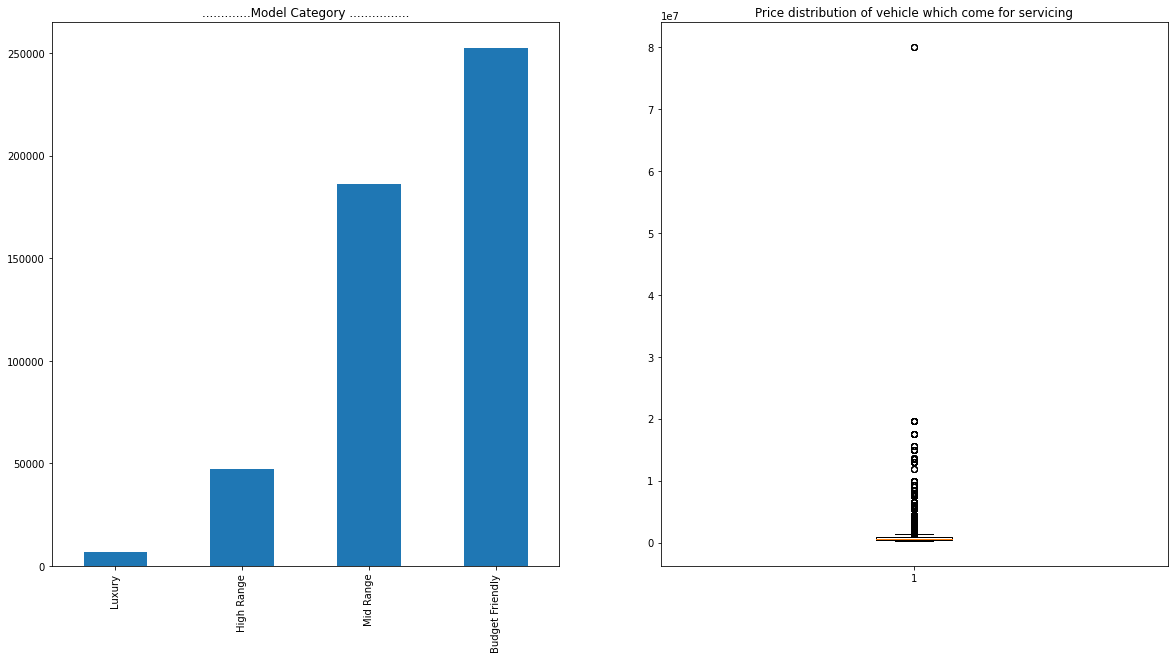

In [24]:

plt.figure(figsize=(20,10))
plt.subplot(121)
df['Model Category'].value_counts().sort_values().plot(kind='bar')
plt.title('.............Model Category ................')
plt.subplot(122)
plt.boxplot(df['Price'])
plt.title('Price distribution of vehicle which come for servicing')

In [25]:
df['age']=df['age'].replace('03-May','3-5').replace('01-Mar','1-3')

Text(0.5, 1.0, '.............Age ................')

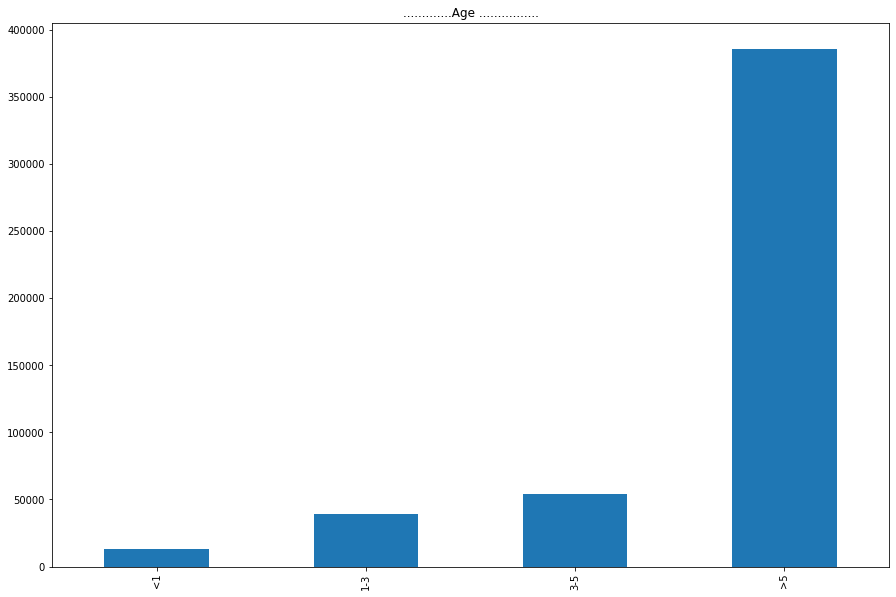

In [26]:
plt.figure(figsize=(15,10))
df['age'].value_counts().sort_values().plot(kind='bar')
plt.title('.............Age ................')

Text(0.5, 1.0, '.............Age ................')

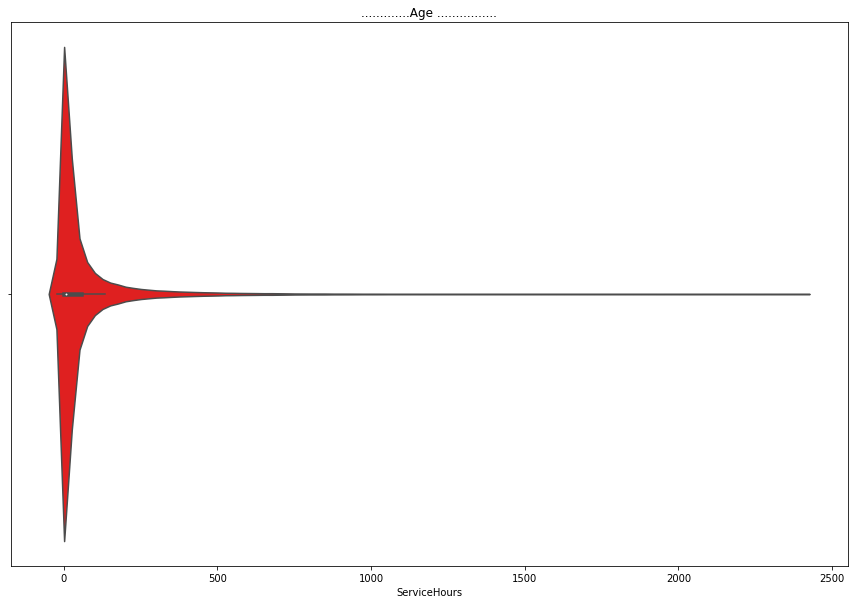

In [27]:

plt.figure(figsize=(15,10))
sns.violinplot(df['ServiceHours'],color='r')
plt.title('.............Age ................')

Text(0.5, 1.0, '.............Age ................')

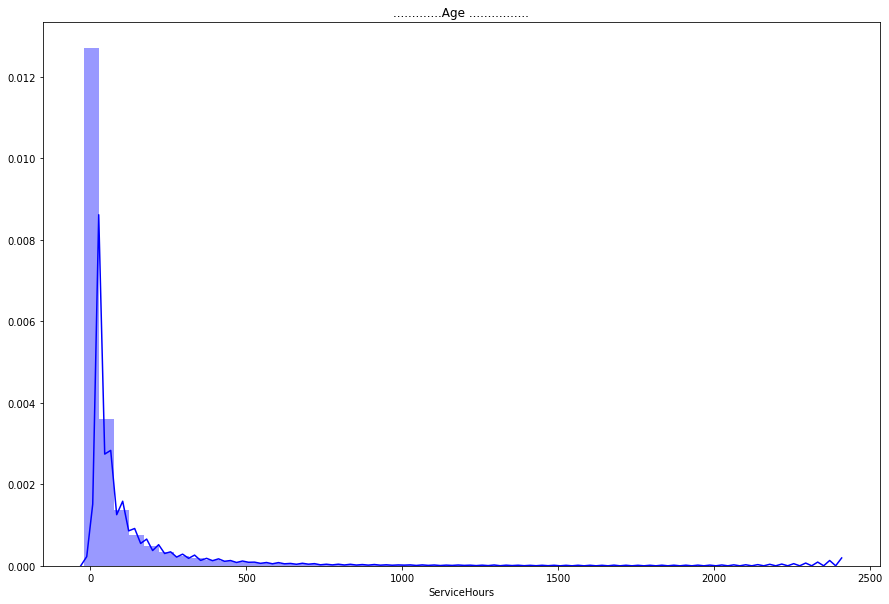

In [28]:
plt.figure(figsize=(15,10))
sns.distplot(df['ServiceHours'],color='b')
plt.title('.............Age ................')

- maximum service lies between 0-20 days

Text(0.5, 1.0, 'Bussiness Growth Year wise')

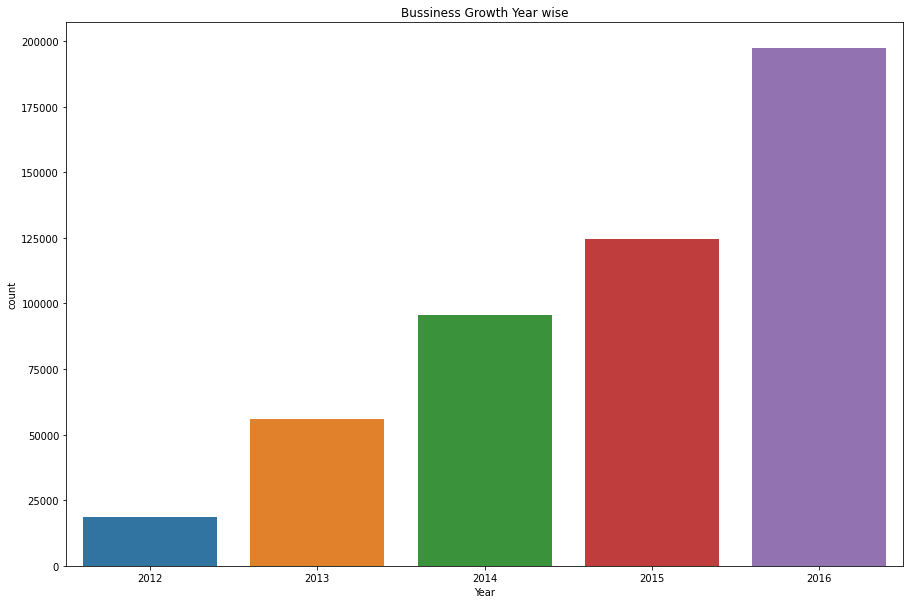

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(df['Year'])
plt.title('Bussiness Growth Year wise')

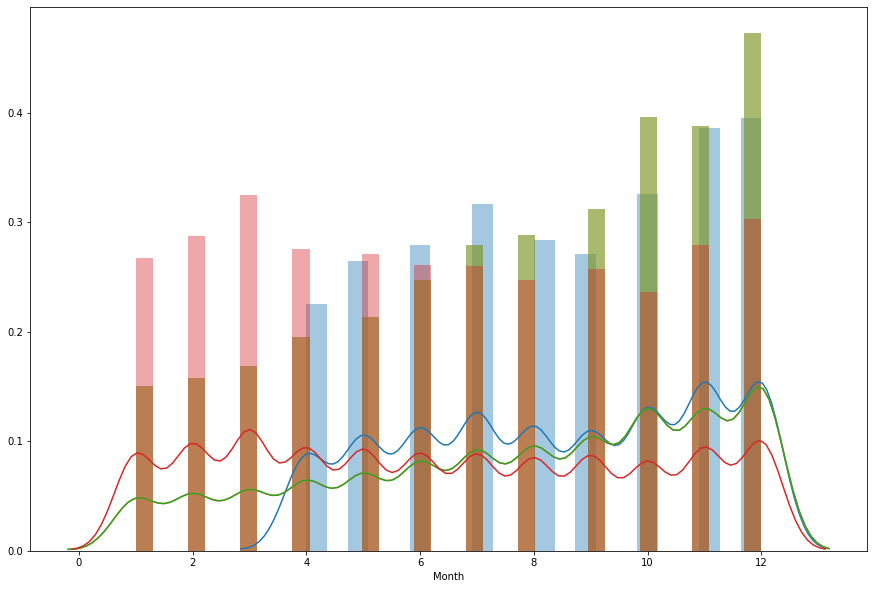

In [32]:
plt.figure(figsize=(15,10))
year=[2012,2013,2013,2014]
for i in year:
    sns.distplot(df[df['Year']==i].Month)
    #plt.plot(df[df['Year']==i].Month, color="Slateblue",alpha=0.6)


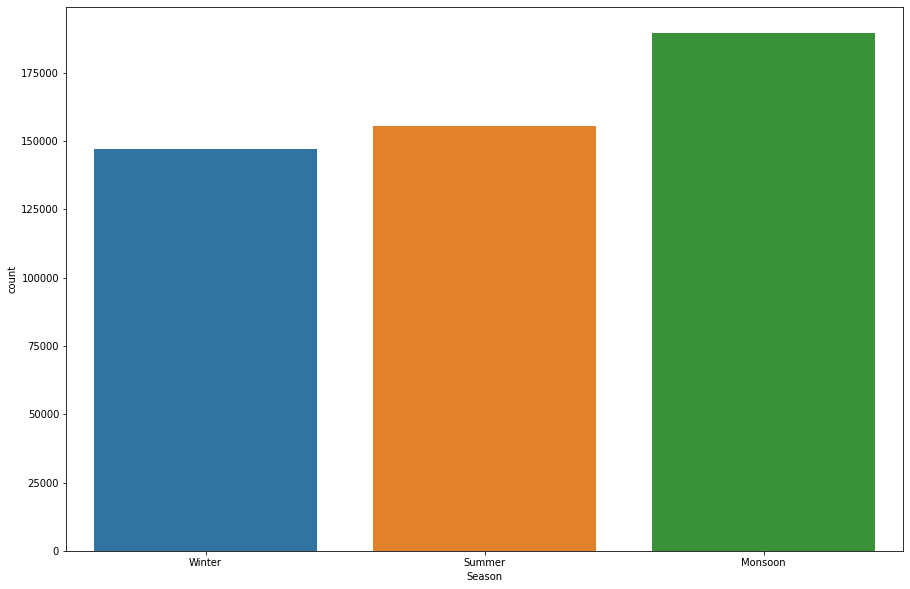

In [53]:
plt.figure(figsize=(15,10))
year=[2012,2013,2013,2014,2015,2016]
for i in year:
    sns.countplot(df.Season)

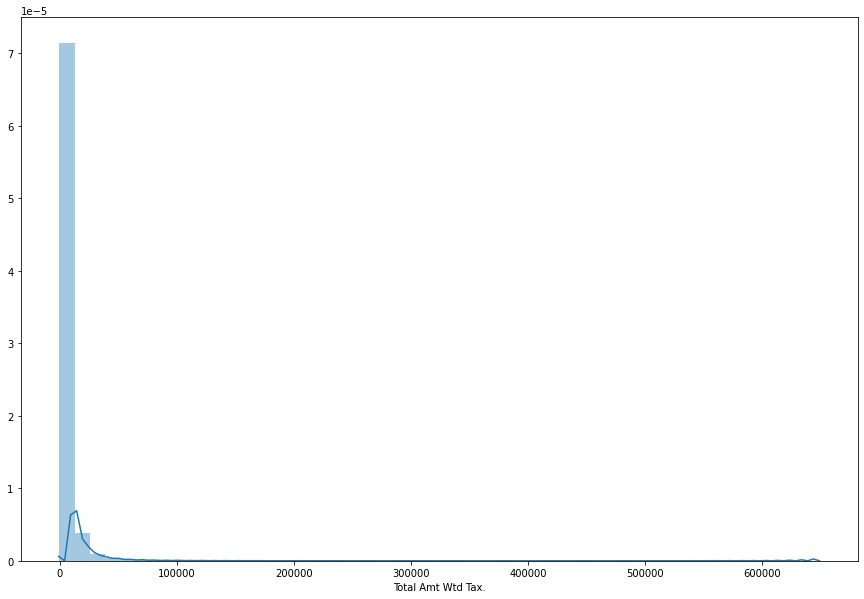

In [54]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Amt Wtd Tax.'])

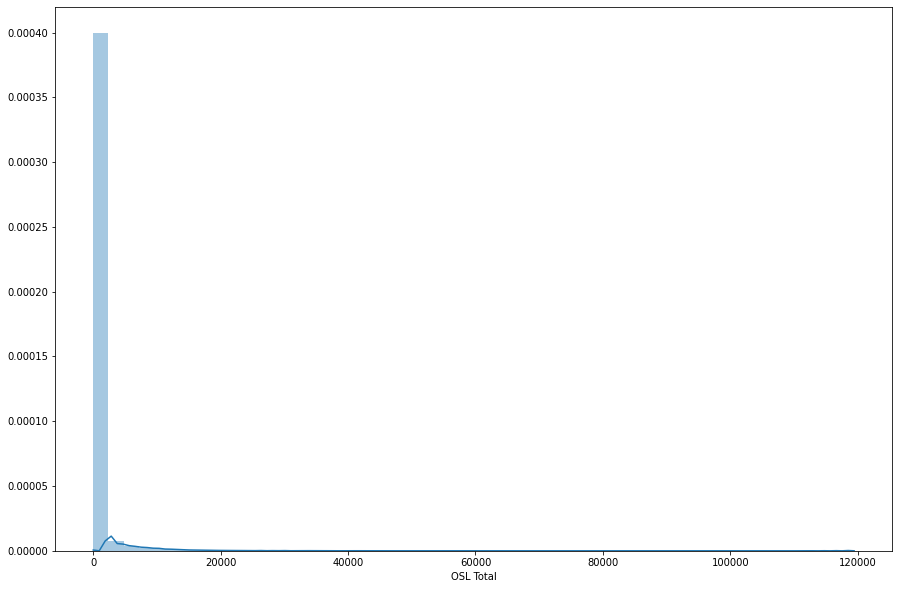

In [55]:
plt.figure(figsize=(15,10))
sns.distplot(df['OSL Total'])

## Bivarent

Cust Type
Corporate others     7917.446546
Corporate- M&M      11345.260630
Fleets               5632.752399
Franchise            3171.022667
Insurance            4235.490000
MFCWL                3452.439127
Retail               4382.112728
Name: Total Amt Wtd Tax., dtype: float64


Text(0.5, 1.0, '.............Avg spending on customer type(Year wise) ................')

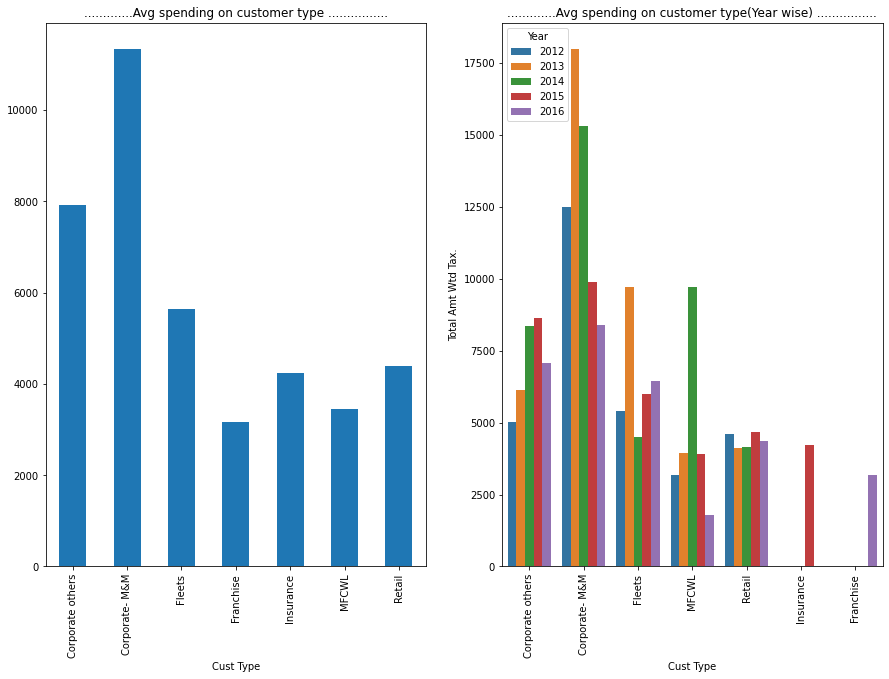

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(121)
df.groupby('Cust Type')['Total Amt Wtd Tax.'].mean().plot(kind='bar')
plt.title('.............Avg spending on customer type ................')
print(df.groupby('Cust Type')['Total Amt Wtd Tax.'].mean())
plt.subplot(122)
avg_cost=df.groupby(['Year','Cust Type'])['Total Amt Wtd Tax.'].mean().reset_index()
sns.barplot(avg_cost['Cust Type'],avg_cost['Total Amt Wtd Tax.'],hue=avg_cost['Year'])
plt.xticks(rotation=90)
plt.title('.............Avg spending on customer type(Year wise) ................')

### we can also evalueate the plant reputation by customer frequency and this way we can find top 50 reputed plant..

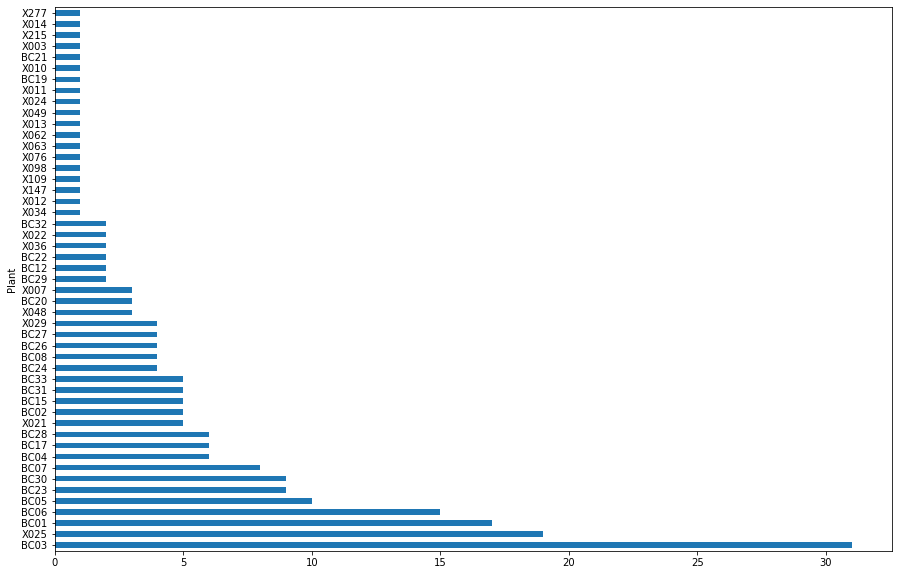

In [112]:
plt.figure(figsize=(15,10))
df_plant=df.groupby(['Plant','Customer No.']).count()['Invoice No'].reset_index()
df_plant[df_plant['Invoice No']>20].groupby('Plant')['Customer No.'].count().sort_values(ascending=False).head(50).plot(kind='barh')

Text(0.5, 1.0, '.............total spending on Data Origin ................')

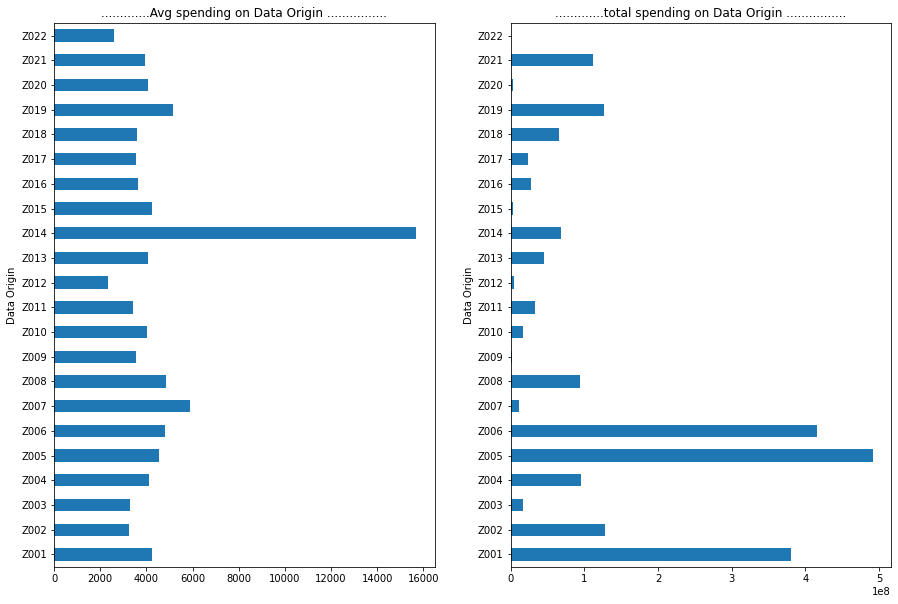

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(121)
df.groupby('Data Origin')['Total Amt Wtd Tax.'].mean().plot(kind='barh')
plt.title('.............Avg spending on Data Origin ................')
plt.subplot(122)
df.groupby('Data Origin')['Total Amt Wtd Tax.'].sum().plot(kind='barh')
plt.title('.............total spending on Data Origin ................')

Text(0.5, 1.0, '.............total spending on Model ................')

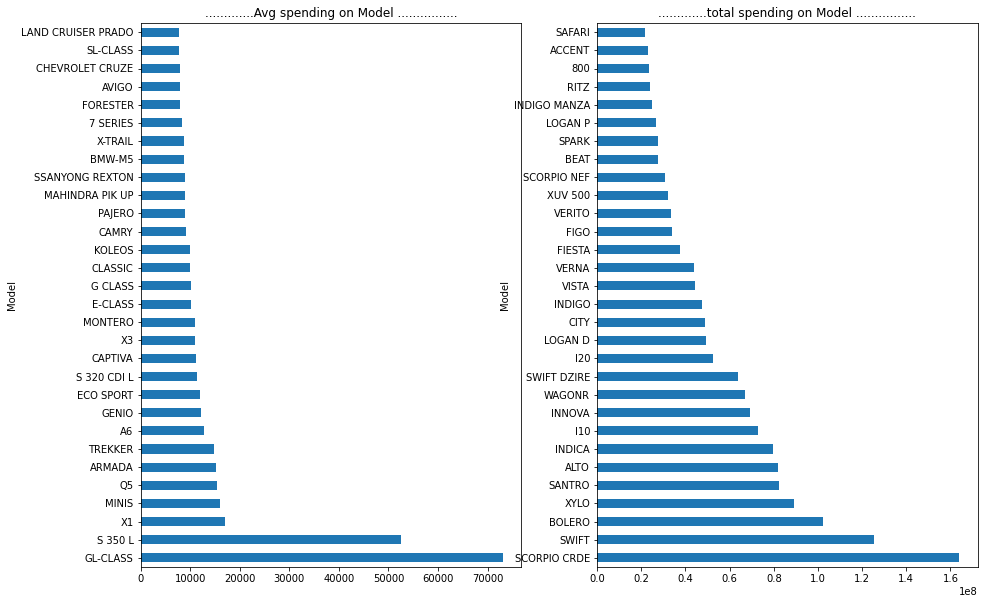

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(121)
df.groupby('Model')['Total Amt Wtd Tax.'].mean().sort_values(ascending=False).head(30).plot(kind='barh')
plt.title('.............Avg spending on Model ................')
plt.subplot(122)
df.groupby('Model')['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.title('.............total spending on Model ................')

In [60]:
model_avg=df.groupby(['Model Category','age'])['Total Amt Wtd Tax.'].mean().reset_index()
model_avg.age=model_avg.age.replace('01-Mar','1-3').replace('03-May','3-5')

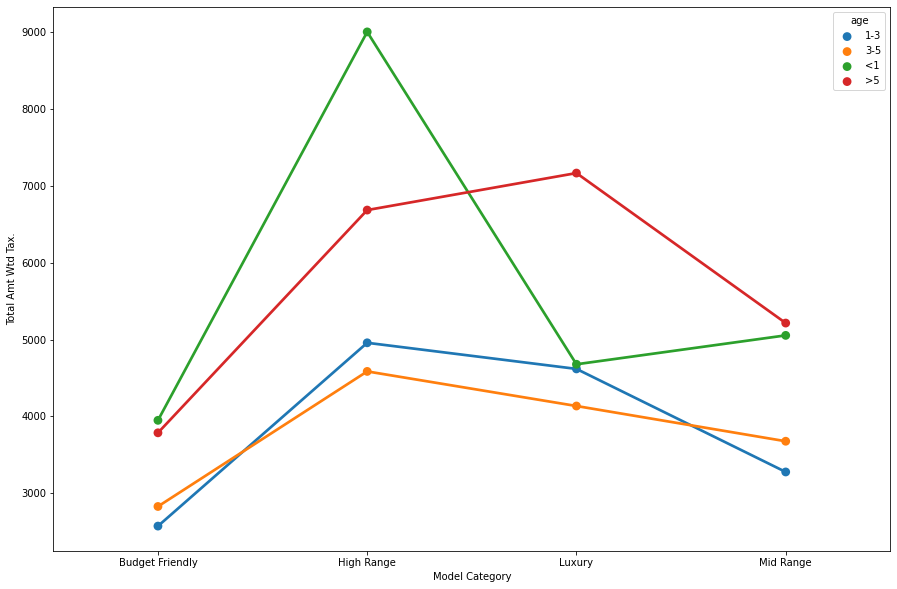

In [61]:
plt.figure(figsize=(15,10))

sns.pointplot(model_avg['Model Category'],model_avg['Total Amt Wtd Tax.'],hue=model_avg['age'])

- We have divided the dataset into model types which is the type of the car [Budget Friendly,High Range,Luxury,Mid Range]. Also we have classified cars as per their age on the basis average mileage  [<1year,1-3 year, 3-5 year, >5 year] 
- The graph suggests the average spending on a particular car type as per its age.
- As seen in the graph, initial years average spending on a high range car shoots up tremendously as compared to other car types.

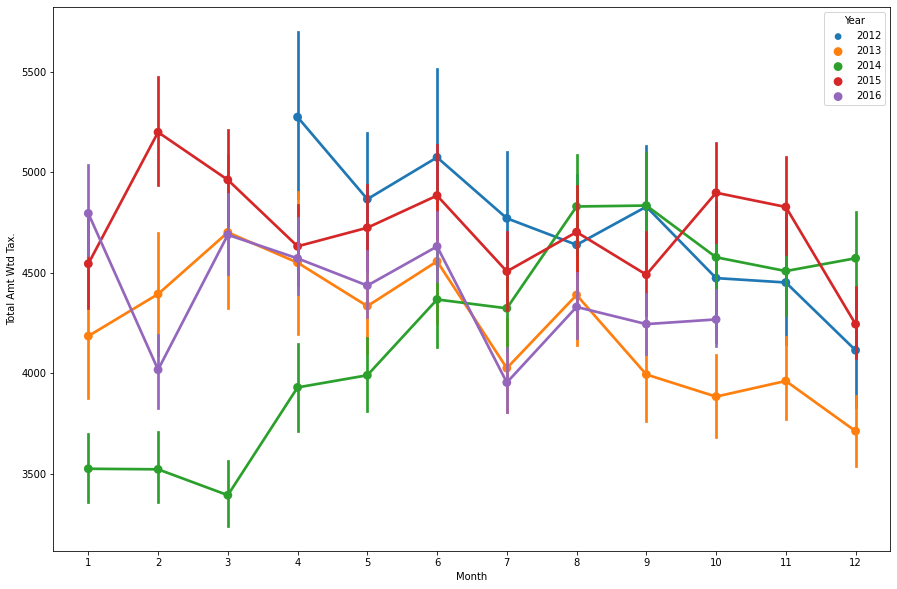

In [62]:
plt.figure(figsize=(15,10))

sns.pointplot(df.Month,df['Total Amt Wtd Tax.'],hue=df['Year'])

In [63]:
make_count=new_df.groupby(['Make','state'])['Regn No'].count().reset_index()
make_count

,Make,state,Regn No
0,AUDI,Andhra Pradesh,10
1,AUDI,Gujarat,9
2,AUDI,Haryana,2
3,AUDI,Himachal Pradesh,1
4,AUDI,Karnataka,11
...,...,...,...
430,VOLVO,Puducherry,1
431,VOLVO,Punjab,1
432,VOLVO,Rajasthan,1
433,VOLVO,Tamil Nadu,5


In [64]:
# ownershipe pattern statewise
make_pattern=pd.pivot(make_count,index='state',columns='Make',values='Regn No').fillna(0)
make_pattern

Make,AUDI,BMW,DAEWOO,FIAT,FORCE,FORD,GENERAL MOTORS,HINDUSTAN MOTORS,HONDA,HYUNDAI,JEEP,LAND ROVER,MAHINDRA & MAHINDRA,MARUTI SUZUKI,MERCEDES BENZ,MITSUBISHI MOTORS,MORRIS,NISSAN,PORCHE,PREMIER AUTOMOBILES,RENAULT,SAN MOTORS,SKODA,SONALIKA,TATA MOTORS,TOYOTA,VOLKSWAGEN,VOLVO
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,10.0,10.0,24.0,298.0,20.0,1171.0,1266.0,10.0,519.0,3475.0,0.0,1.0,3072.0,6682.0,12.0,36.0,0.0,166.0,1.0,0.0,142.0,1.0,354.0,7.0,3601.0,981.0,305.0,4.0
Assam,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,18.0,0.0,0.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Bihar,0.0,0.0,0.0,7.0,1.0,29.0,125.0,0.0,32.0,153.0,1.0,0.0,1225.0,447.0,1.0,2.0,0.0,2.0,1.0,0.0,7.0,0.0,11.0,2.0,499.0,51.0,3.0,0.0
Chandigarh,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,6.0,11.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,0.0
Chhattisgarh,0.0,1.0,0.0,3.0,0.0,15.0,12.0,0.0,24.0,87.0,0.0,0.0,77.0,169.0,0.0,1.0,0.0,7.0,0.0,0.0,9.0,0.0,6.0,0.0,53.0,25.0,2.0,0.0
Gujarat,9.0,16.0,8.0,206.0,2.0,362.0,741.0,0.0,540.0,3361.0,0.0,1.0,1174.0,5107.0,18.0,25.0,0.0,143.0,0.0,4.0,106.0,0.0,213.0,1.0,952.0,397.0,171.0,1.0
Haryana,2.0,2.0,12.0,100.0,5.0,303.0,549.0,1.0,346.0,2197.0,0.0,1.0,986.0,3986.0,2.0,24.0,0.0,63.0,0.0,0.0,95.0,0.0,142.0,0.0,586.0,410.0,142.0,0.0
Himachal Pradesh,1.0,1.0,1.0,24.0,2.0,89.0,168.0,1.0,62.0,448.0,0.0,0.0,301.0,1002.0,1.0,4.0,0.0,8.0,0.0,0.0,19.0,0.0,28.0,0.0,183.0,93.0,13.0,0.0
Jharkhand,0.0,0.0,0.0,2.0,0.0,5.0,8.0,0.0,5.0,30.0,0.0,0.0,22.0,63.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,18.0,10.0,0.0,0.0


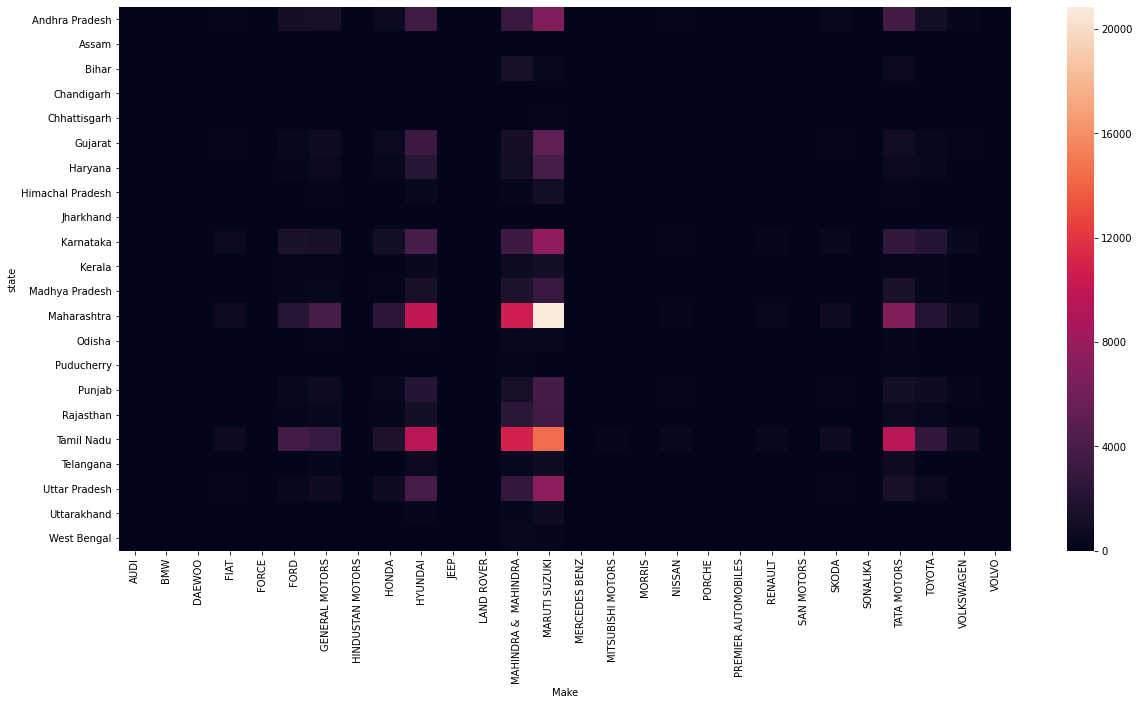

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(make_pattern)

In [66]:
model_count=new_df.groupby(['state','Model'])['Regn No'].count().reset_index()
model_count

,state,Model,Regn No
0,Andhra Pradesh,207,12
1,Andhra Pradesh,3 SERIES,1
2,Andhra Pradesh,5 SERIES,1
3,Andhra Pradesh,800,623
4,Andhra Pradesh,A STAR,69
...,...,...,...
2921,West Bengal,XCENT,5
2922,West Bengal,XUV 500,18
2923,West Bengal,XYLO,49
2924,West Bengal,ZEN,11


In [67]:
model_pattern=pd.pivot(model_count,index='state',columns='Model',values='Regn No').fillna(0)
model_pattern

Model,207,3 SERIES,5 SERIES,500,6 SERIES,7 SERIES,800,A STAR,A4,A6,A7,A8,ACCENT,ACCORD,ACE,ADVENTURE,ALTO,AMAZE,AMBASSADOR,AMEO,ARIA,ARMADA,AUSTIN,AVEO,AVEO UV-A,AVIGO,BALENO,BEAT,BMW X6,BMW-M3,BMW-M5,BMW-M6,BOLERO,BOLERO PIK UP,BOLT,BREZZA,BRIO,BRV,C-CLASS,CAMRY,CAPTIVA,CAYENNE,CAYMAN S,CEDIA,CELERIO,CHEROKEE,CHEVROLET CRUZE,CIAZ,CIELO,CITY,CIVIC,CL-CLASS,CLASSIC,CLK-CLASS,CLS-CLASS,COMMANDER,CONTESSA,COROLLA,COROLLA ALTIS,CR-V,CRETA,DATSUN GO,DUSTER,E-CLASS,ECOSPORT,EECO,ELANTRA,ENDEAVOUR,ENJOY,EON,ERTIGA,ESCORT,ESTEEM 1000,ESTEEM 1300,ESTILO,ETIOS,EVALIA,FABIA,FIESTA,FIGO,FLUENCE,FOCUS,FORCE ONE,FORESTER,FORTUNER,FUSION,G CLASS,GENIO,GETZ,GL-CLASS,GRAND,GRAND PUNTO,GRAND VITARA,GYPSY 1000,GYPSY 1300,I10,I20,IKON,INDICA,INDIGO,INDIGO MANZA,INDIGO MARINA,INNOVA,JAGUAR XF,JAGUAR XJ,JAGUAR XL,JAZZ,JETTA,KIZASHI,KOLEOS,KUV100,KWID,LANCER,LAND CRUISER PRADO,LAND ROVER DISCOVERY,LAND ROVER FREELANDER,LAND ROVER RANGE ROVER,LAURA,LAUREL,LIMOUSINE,LINEA,LODGY,LOGAN D,LOGAN P,MAGIC,MAHINDRA CNG,MAHINDRA MM,MAHINDRA PIK UP,MARSHAL,MATIZ,MAXX,MAXXIMO,MICRA,MINIS,ML 350,ML-CLASS,MOBILIO,MONDEO,MONTERO,NANO,NEXIA,OCTAVIA,OMNI,OPEL,OPEL ASTRA,OPEL CORSA,OPTRA,OPTRA MAGNUM,OUTLANDER,PADMINI,PAJERO,PALIO,PALIO STILE,PASSAT,PETRA,POLO,PULSE,PUSHPAK,Q5,Q7,QUALIS,QUANTO,RAPID,RENAULT 1.9,REVA,RHINO RX,RIO,RITZ,ROOMSTER,ROVER,S 320 CDI L,S 350 L,S-CLASS,SAFARI,SAIL,SAN STORM 1.2,SANTA FE,SANTRO,SANTRO XING,SCALA,SCORPIO CRDE,SCORPIO NEF,SIENA,SIERRA,SL-CLASS,SLK-CLASS,SONATA,SONATA V-6,SPARK,SRV,SSANYONG KORANDO,SSANYONG REXTON,SUMO,SUMO GRANDE,SUPER SUNNY,SUPERB,SUPRO,SWIFT,"SWIFT D,ZIRE",SWIFT DZIRE,SX4,TATA-NANO,TAVERA,TAVERA NEO,TEANA,TERRACAN,TERRANO,THAR,TIAGO,TL,TOUAREG,TRAILBLAZER,TRAX,TREKKER,TT,TUCSON,TUV300,UNO,VECTRA,VELOSTER,VENTO,VENTURE,VERITO,VERNA,VERSA,VISTA,VOLVO S80,VOLVO XC90,WAGONR,WINGER,X-TRAIL,X1,X3,X5,XCENT,XENON XT,XUV 500,XYLO,YETI,Z4,ZEN,ZEN ESTILO,ZEST
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,12.0,1.0,1.0,0.0,0.0,0.0,623.0,69.0,3.0,3.0,0.0,0.0,215.0,8.0,12.0,2.0,1591.0,74.0,10.0,2.0,6.0,0.0,0.0,47.0,42.0,0.0,28.0,268.0,1.0,3.0,0.0,1.0,573.0,136.0,6.0,5.0,22.0,0.0,5.0,4.0,16.0,0.0,1.0,4.0,12.0,0.0,33.0,23.0,1.0,342.0,30.0,1.0,1.0,0.0,1.0,2.0,0.0,29.0,25.0,5.0,9.0,6.0,64.0,2.0,42.0,33.0,10.0,6.0,27.0,85.0,135.0,10.0,36.0,37.0,0.0,195.0,0.0,87.0,427.0,415.0,10.0,0.0,10.0,0.0,24.0,17.0,0.0,1.0,91.0,0.0,0.0,118.0,2.0,1.0,1.0,872.0,464.0,252.0,1198.0,545.0,213.0,47.0,647.0,1.0,0.0,0.0,23.0,8.0,1.0,3.0,0.0,4.0,27.0,1.0,0.0,0.0,0.0,59.0,2.0,2.0,96.0,0.0,345.0,65.0,2.0,1.0,7.0,19.0,7.0,23.0,12.0,2.0,66.0,0.0,2.0,0.0,15.0,0.0,1.0,163.0,0.0,103.0,122.0,7.0,8.0,30.0,44.0,11.0,0.0,0.0,4.0,69.0,5.0,6.0,1.0,160.0,31.0,0.0,3.0,1.0,56.0,23.0,84.0,18.0,1.0,7.0,0.0,299.0,0.0,1.0,0.0,0.0,1.0,194.0,149.0,1.0,8.0,1139.0,92.0,12.0,780.0,137.0,2.0,1.0,0.0,0.0,4.0,6.0,317.0,2.0,0.0,4.0,102.0,22.0,68.0,15.0,1.0,1543.0,0.0,703.0,80.0,0.0,188.0,76.0,4.0,0.0,19.0,8.0,1.0,1.0,1.0,1.0,10.0,0.0,0.0,4.0,1.0,5.0,0.0,0.0,128.0,8.0,446.0,436.0,2.0,1022.0,2.0,2.0,858.0,9.0,1.0,3.0,0.0,0.0,40.0,10.0,126.0,374.0,6.0,0.0,325.0,153.0,26.0
Assam,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

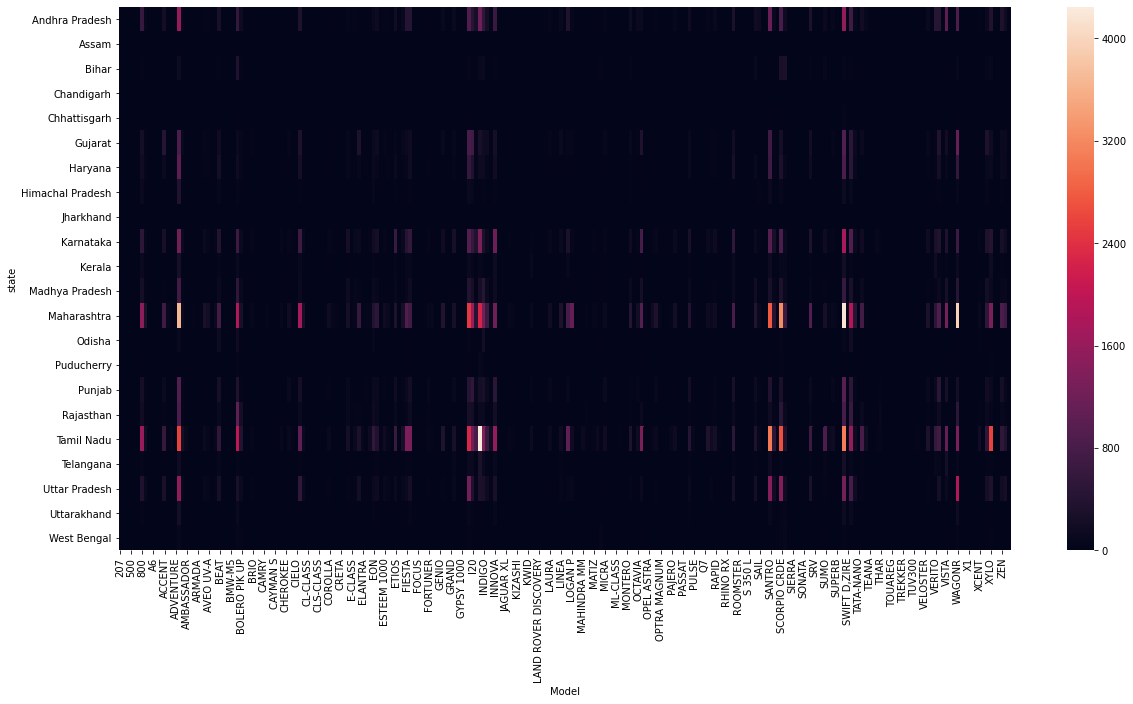

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(model_pattern)

In [69]:

model_cat_count=new_df.groupby(['state','Model Category'])['Regn No'].count().reset_index()
model_cat_count

,state,Model Category,Regn No
0,Andhra Pradesh,Budget Friendly,12235
1,Andhra Pradesh,High Range,1803
2,Andhra Pradesh,Luxury,326
3,Andhra Pradesh,Mid Range,7804
4,Assam,Budget Friendly,63
5,Assam,High Range,2
6,Assam,Luxury,1
7,Assam,Mid Range,19
8,Bihar,Budget Friendly,823
9,Bihar,High Range,605


In [70]:
model_cat_pattern=pd.pivot(model_cat_count,index='state',columns='Model Category',values='Regn No').fillna(0)
model_cat_pattern

Model Category,Budget Friendly,High Range,Luxury,Mid Range
state,,,,
Andhra Pradesh,12235,1803,326,7804
Assam,63,2,1,19
Bihar,823,605,20,1151
Chandigarh,25,3,3,23
Chhattisgarh,232,51,5,203
Gujarat,7168,710,226,5454
Haryana,5550,740,160,3504
Himachal Pradesh,1438,138,23,850
Jharkhand,93,16,1,58


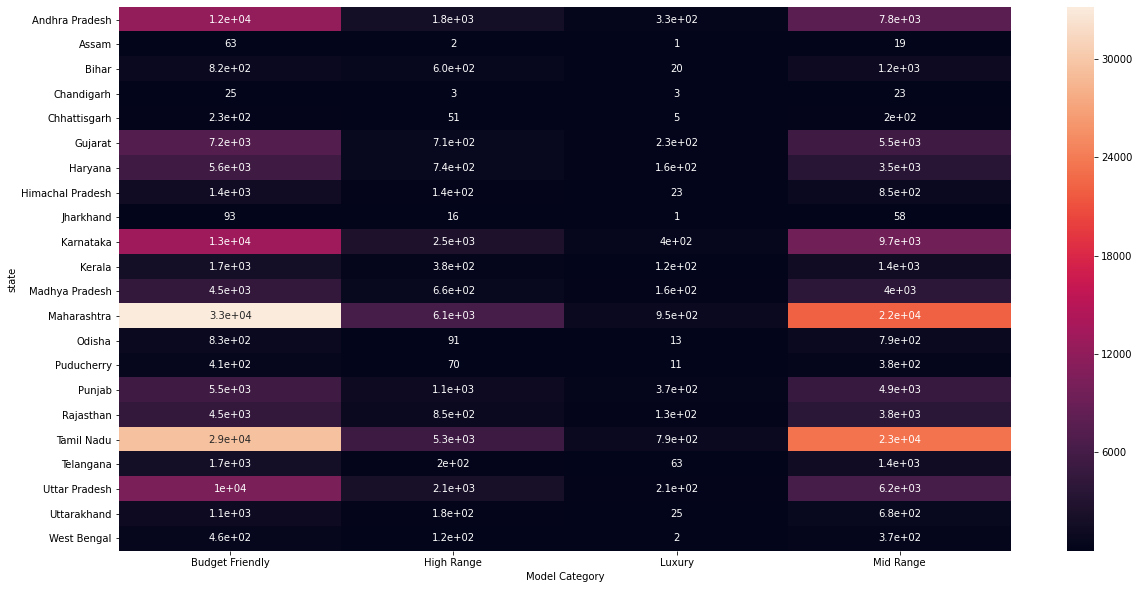

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(model_cat_pattern, annot=True)

In [72]:
df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14
3,7005200005,174158,84419,Retail,1,SMC Redemption,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,1.47,0 days 01:28:12.000000000,78584,2015,1,Winter,0.00,0.00,0.00,0.00,0.0,0.00
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12


In [73]:
osl=df.groupby(['state','Model Category'])['OSL Total'].mean().reset_index()
osl

,state,Model Category,OSL Total
0,Andhra Pradesh,Budget Friendly,550.126574
1,Andhra Pradesh,High Range,864.280354
2,Andhra Pradesh,Luxury,818.743156
3,Andhra Pradesh,Mid Range,767.649302
4,Assam,Budget Friendly,0.000000
5,Assam,High Range,0.000000
6,Assam,Luxury,0.000000
7,Assam,Mid Range,0.000000
8,Bihar,Budget Friendly,16.071106
9,Bihar,High Range,30.842763


In [74]:
osl_avg=pd.pivot(osl,index='state',columns='Model Category',values='OSL Total').fillna(0)
osl_avg

Model Category,Budget Friendly,High Range,Luxury,Mid Range
state,,,,
Andhra Pradesh,550.126574,864.280354,818.743156,767.649302
Assam,0.000000,0.000000,0.000000,0.000000
Bihar,16.071106,30.842763,0.000000,7.873908
Chandigarh,164.669231,0.000000,295.706667,193.681786
Chhattisgarh,0.000000,0.000000,0.000000,0.000000
Gujarat,500.401530,934.407986,600.648824,657.126374
Haryana,524.093606,721.869047,545.456151,611.966016
Himachal Pradesh,0.000000,0.000000,0.000000,0.000000
Jharkhand,0.000000,0.000000,0.000000,0.000000


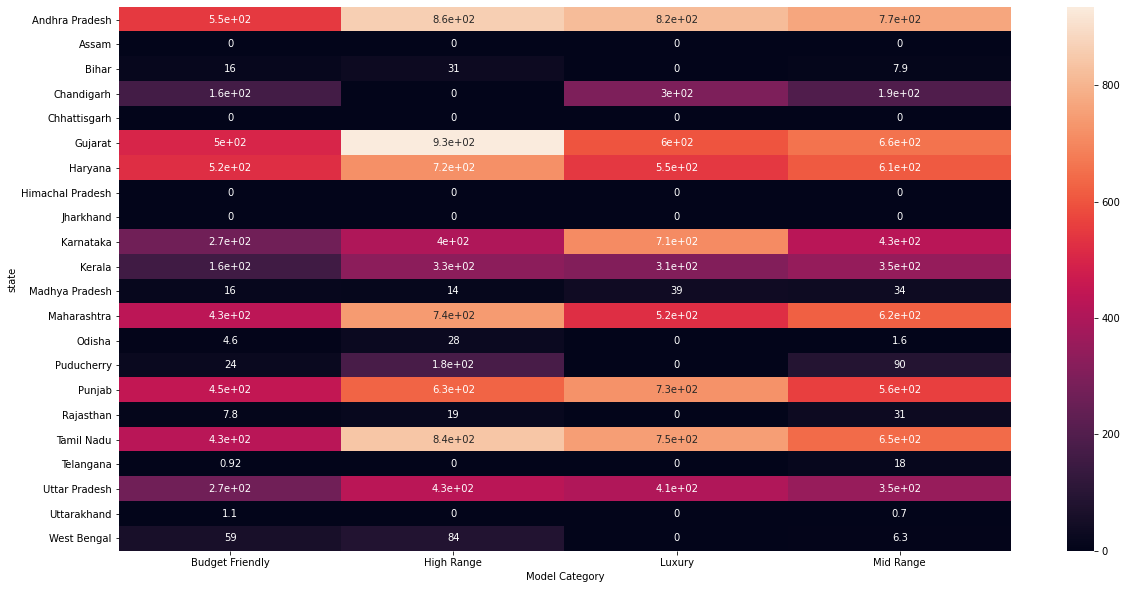

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(osl_avg, annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

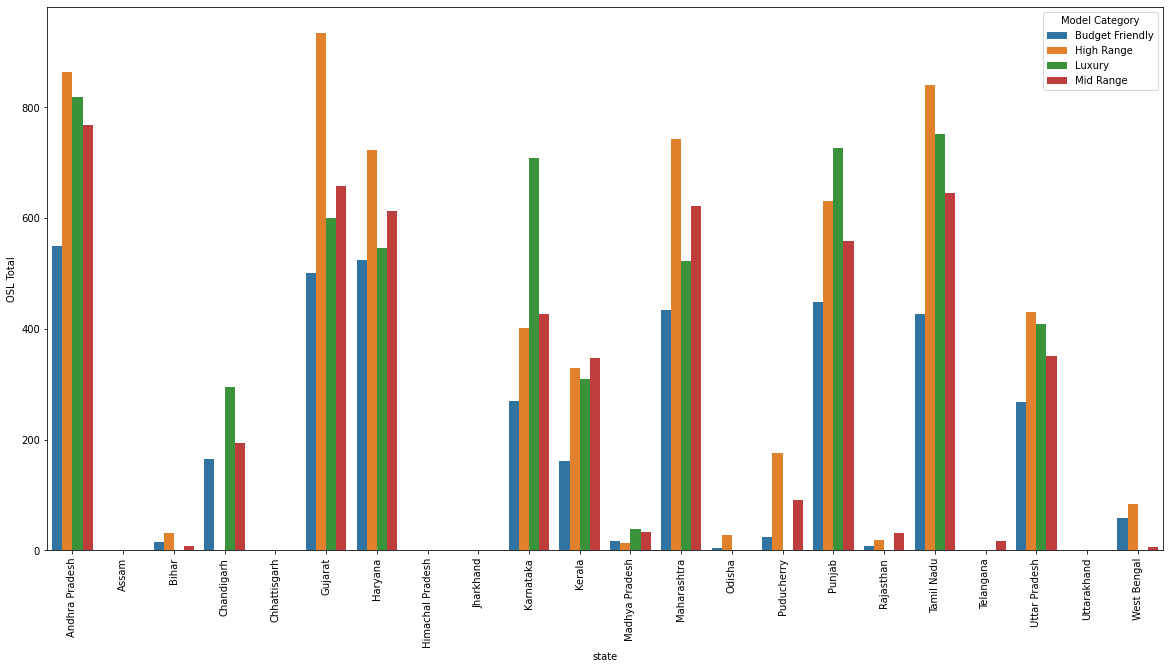

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(osl['state'],osl['OSL Total'],hue=osl['Model Category'])
plt.xticks(rotation=90)

Text(0.5, 1.0, '.............avg maximum service_hour ................')

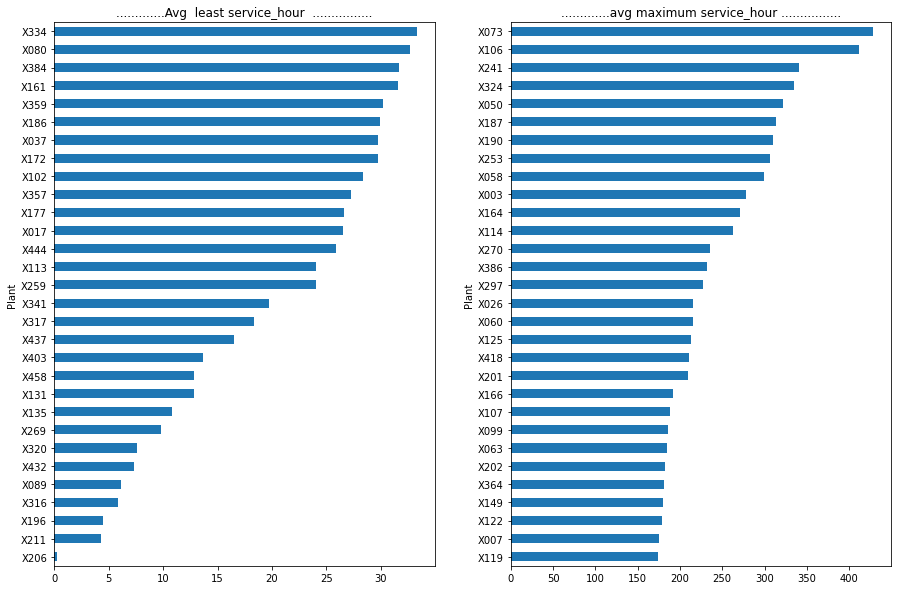

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(121)
df.groupby(['Plant']).ServiceHours.mean().sort_values().head(30).plot(kind='barh')
plt.title('.............Avg  least service_hour  ................')
plt.subplot(122)
df.groupby(['Plant']).ServiceHours.mean().sort_values().tail(30).plot(kind='barh')
plt.title('.............avg maximum service_hour ................')

In [40]:
for i in list(df['Customer No.'].unique()):
    for j in range(len(df)):
        
            
    df['Customer No.']
    
    

IndentationError: expected an indented block (<ipython-input-40-423b5aa3ef14>, line 6)

In [38]:
list(df['Customer No.'].unique()

['67849',
 '84419',
 '81055',
 '18980',
 '84457',
 '12523',
 '55220',
 '84511',
 '41390',
 '7303',
 '12481',
 '84629',
 '52385',
 '84371',
 '56291',
 '8174',
 '84587',
 'E12734',
 '16933',
 '22935',
 '84561',
 'E6634',
 '80479',
 '75177',
 '84712',
 '84706',
 '84703',
 '84707',
 '84710',
 '11504',
 '66599',
 '63302',
 '49147',
 '3457',
 '84821',
 '82212',
 '63460',
 '85316',
 '536',
 '85294',
 '85318',
 '85148',
 '30728',
 '43091',
 '8120',
 '68068',
 '85432',
 '85371',
 '5182',
 '85547',
 'E3930',
 '60057',
 '85599',
 '85533',
 '85593',
 '32377',
 '73494',
 '85650',
 '85598',
 '82548',
 '85576',
 '85784',
 '8261',
 '85721',
 '32982',
 '38827',
 '23244',
 'E1208',
 '62440',
 '85767',
 '85798',
 '67651',
 '80172',
 '85841',
 '24613',
 '85914',
 '69540',
 '85739',
 '86191',
 '24772',
 '86176',
 'E15810',
 '84536',
 '10606',
 '73055',
 '85933',
 '45557',
 '6318',
 '8218',
 '1584',
 '86281',
 '62273',
 '67370',
 '55765',
 '86381',
 '86357',
 '21953',
 '86426',
 '29422',
 '74270',
 'E26809'

In [79]:
new_df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Regn No
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95,KA19MA1291
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29,MH43R3046
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14,AP09AX0582
4,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12,MH04CD9768
5,7005200007,174053,84457,Retail,1,Running Repairs,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TOYOTA,INNOVA,1566000,High Range,01-Mar,0,20.90,0 days 20:54:58.000000000,13122,2015,1,Winter,0.00,14.22,851.70,0.00,0.0,865.92,MH04GM2960


In [80]:
df=df.dropna()
frequency=df['Customer No.'].value_counts()

In [81]:
freq=pd.DataFrame(frequency)
freq.columns=['Frequency']
freq['Customer No.']=freq.index
freq=freq.reset_index().drop('index',axis=1)

In [82]:
new_df=pd.merge(new_df,freq,on='Customer No.',how='left')
new_df=new_df.dropna()

In [83]:
new_df.head()

,Invoice No,Job Card No,Customer No.,Cust Type,Partner Type,Order Type,Data Origin,User ID,Plant,Plant Name1,City,state,Zones,Make,Model,Price,Model Category,age,Days,ServiceHours,Service_Time,KMs Reading,Year,Month,Season,Labour Total,Parts Total,OSL Total,Misc Total,Recovrbl Exp,Total Amt Wtd Tax.,Regn No,Frequency
0,7005200002,168303,67849,Retail,1,Paid Service,Z007,BC01FS1,BC01,THANE,thane,Maharashtra,West,GENERAL MOTORS,SPARK,360000,Budget Friendly,>5,19,477.00,19 days 21:00:53.000000000,49317,2015,1,Winter,1203.14,2348.75,500.06,0.00,0.0,4051.95,KA19MA1291,5
1,7005200003,173997,84419,Retail,1,SMC Value Package,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TATA MOTORS,INDICA,499000,Budget Friendly,>5,0,19.92,0 days 19:55:14.000000000,78584,2015,1,Winter,804.26,0.00,0.00,197.03,0.0,1001.29,MH43R3046,6
2,7005200004,173889,81055,Retail,1,Running Repairs,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,MARUTI SUZUKI,ZEN,340000,Budget Friendly,>5,0,23.53,0 days 23:32:13.000000000,33985,2015,1,Winter,180.19,52.95,0.00,0.00,0.0,233.14,AP09AX0582,3
3,7005200006,173860,18980,Retail,1,Paid Service,Z005,BC01SA2,BC01,THANE,thane,Maharashtra,West,HYUNDAI,SANTRO XING,457000,Budget Friendly,>5,1,25.35,1 days 01:21:35.000000000,50057,2015,1,Winter,1202.97,944.16,499.99,100.00,0.0,2747.12,MH04CD9768,8
4,7005200007,174053,84457,Retail,1,Running Repairs,Z001,BC01SA2,BC01,THANE,thane,Maharashtra,West,TOYOTA,INNOVA,1566000,High Range,01-Mar,0,20.90,0 days 20:54:58.000000000,13122,2015,1,Winter,0.00,14.22,851.70,0.00,0.0,865.92,MH04GM2960,3
